# Prosper Loan Data Exploration
## by Amanda Legi

## Preliminary Wrangling

> This document explores a dataset of irrecoverable loan properties from Prosper Loan.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [5]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
pd.set_option('display.max_columns', None)
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

I will be doing some data wrangling to fix some irregularities, such as renaming columns and converting data types to ease our data analysis process.

Then I will create a sub dataset that will only consider irrecoverable loans. The criteria that will be used for such dataset is where the loan having principal that remains uncollected after any recoveries.

In [7]:
# Rename columns that are having spaces in between
prosper_loan.rename(columns={"ProsperRating (numeric)": "ProsperRatingNumeric", 
                             "ProsperRating (Alpha)": "ProsperRatingAlpha",
                             "ListingCategory (numeric)": "ListingCategoryNumeric",
                             "TradesNeverDelinquent (percentage)": "TradesNeverDelinquentPercentage"}, inplace=True)

In [8]:
# Convert NC (No Credit) values in CreditGrade column to NaN
prosper_loan['CreditGrade'] = prosper_loan['CreditGrade'] .replace('NC', np.nan)

In [9]:
# Combine credit rating columns from CreditGrade (records before 2009) and ProsperRatingAlpha (records after July 2009)
prosper_loan['CreditRatingCombined'] = np.where(prosper_loan.ProsperRatingAlpha.isna(), prosper_loan.CreditGrade, prosper_loan.ProsperRatingAlpha)

In [10]:
prosper_loan.CreditRatingCombined.unique()

array(['C', 'A', 'HR', 'D', 'B', 'E', 'AA', nan], dtype=object)

In [11]:
# convert CreditRatingCombined into ordered categorical types
credit_rating = ['HR','E','D','C','B','A','AA']
cr = pd.api.types.CategoricalDtype(ordered=True, categories=credit_rating)
prosper_loan['CreditRatingCombined'] = prosper_loan['CreditRatingCombined'].astype(cr);

In [12]:
# drop records without Nett Principal Loss to create a sub dataset for irrecoverable loans
df = prosper_loan.drop(prosper_loan[prosper_loan['LP_NetPrincipalLoss'] == 0].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 15 to 113926
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   ListingKey                           16715 non-null  object  
 1   ListingNumber                        16715 non-null  int64   
 2   ListingCreationDate                  16715 non-null  object  
 3   CreditGrade                          10424 non-null  object  
 4   Term                                 16715 non-null  int64   
 5   LoanStatus                           16715 non-null  object  
 6   ClosedDate                           16715 non-null  object  
 7   BorrowerAPR                          16715 non-null  float64 
 8   BorrowerRate                         16715 non-null  float64 
 9   LenderYield                          16715 non-null  float64 
 10  EstimatedEffectiveYield              6183 non-null   float64 
 11  EstimatedLoss

In [13]:
# Extract the relevant columns that will be used in the analysis
df = df[['LP_NetPrincipalLoss', 'DebtToIncomeRatio', 'CreditRatingCombined', 'EmploymentStatus', 'IncomeRange']]
df.head()

,LP_NetPrincipalLoss,DebtToIncomeRatio,CreditRatingCombined,EmploymentStatus,IncomeRange
15,3790.25,0.49,HR,Other,"$50,000-74,999"
17,6012.67,0.12,AA,Not available,Not displayed
23,1882.27,0.39,D,Employed,"$25,000-49,999"
42,1096.92,0.27,HR,Not available,Not displayed
57,1569.03,0.15,D,Employed,"$100,000+"


In [14]:
# Check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 15 to 113926
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LP_NetPrincipalLoss   16715 non-null  float64 
 1   DebtToIncomeRatio     15241 non-null  float64 
 2   CreditRatingCombined  16607 non-null  category
 3   EmploymentStatus      15908 non-null  object  
 4   IncomeRange           16715 non-null  object  
dtypes: category(1), float64(2), object(2)
memory usage: 669.6+ KB


In [15]:
# Drop rows where DebtToIncomeRatio and CreditRatingCombined is missing
index_names = df[ (df.DebtToIncomeRatio.isna()) | (df.CreditRatingCombined.isna())].index
df.drop(index_names, inplace=True)

In [16]:
# Replace missing value in EmploymentStatus with 'Not available'
df.fillna(value={'EmploymentStatus': 'Not available'}, inplace=True)

In [17]:
# Drop rows having Debt-to-Income Ratio larger than 1
df.drop(df[df['DebtToIncomeRatio'] > 1].index, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14897 entries, 15 to 113926
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LP_NetPrincipalLoss   14897 non-null  float64 
 1   DebtToIncomeRatio     14897 non-null  float64 
 2   CreditRatingCombined  14897 non-null  category
 3   EmploymentStatus      14897 non-null  object  
 4   IncomeRange           14897 non-null  object  
dtypes: category(1), float64(2), object(2)
memory usage: 596.8+ KB


### What is the structure of your dataset?

> There are 14897 records in the dataset with 2 numerical variables and 3 categorical variables. Credit Rating and Income Range are ordered factor variables with the following levels.  
>(worst) ——> (best)  
>credit rating: HR, E, D, C, B, A, AA  
>income range: Not displayed, \\$0, \\$1-24,999, \\$25,000-49,999, \\$50,000-74,999, \\$75,000-99,999, \\$100,000+

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the characteristic of irrecoverable loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the irrecoverable loans will have borrower with higher debt-income ratio and lower credit ratings. I am also interested to know if employment status and income range are also a factor in predicting whether a loan will be irrecoverable.

## Univariate Exploration

> I will start by looking at the distribution of the main variable interest: Net Principal Loss.

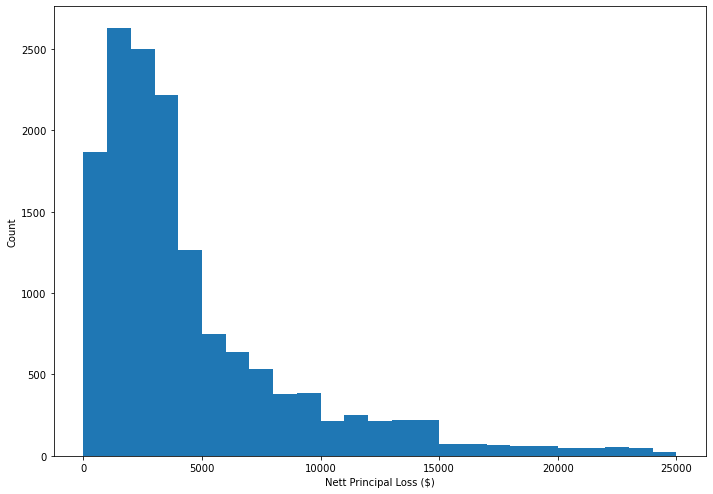

In [23]:
binsize = 1000
bins = np.arange(0, df['LP_NetPrincipalLoss'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data=df, x ='LP_NetPrincipalLoss', bins=bins)
plt.xlabel('Nett Principal Loss ($)')
plt.ylabel('Count');

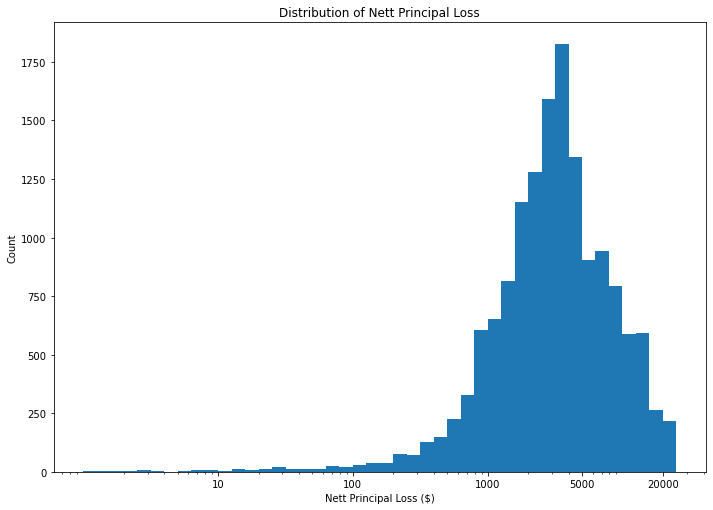

In [24]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['LP_NetPrincipalLoss'].max())+log_binsize, log_binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data=df, x='LP_NetPrincipalLoss', bins=bins)
plt.xscale('log')
plt.xticks([10, 100, 1000, 5000, 20000], [10, 100, 1000, 5000, 20000])
#plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Nett Principal Loss ($)')
plt.ylabel('Count')
plt.title('Distribution of Nett Principal Loss');

> Nett Principal Loss has a long-tailed distribution, with majority of the losses under 5,000. When plotted on a log-scale, we get a normal distribution skewed to the left with large proportion falls between 1,000 and 20,000.

> Next up, the first variable of interest: Debt-to-Income Ratio.

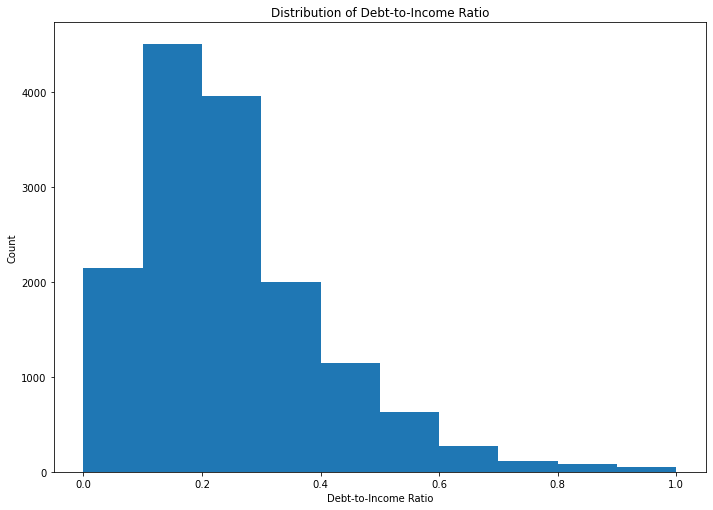

In [25]:
binsize = 0.1
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data=df, x ='DebtToIncomeRatio', bins=bins)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Debt-to-Income Ratio');

The chart above shows that majority of irrecoverable loan is having Debt-to-Income Ratio below 0.4 which is considered low.  

I will now move on to other variables: Credit Rating, Employment Status, Income Range.

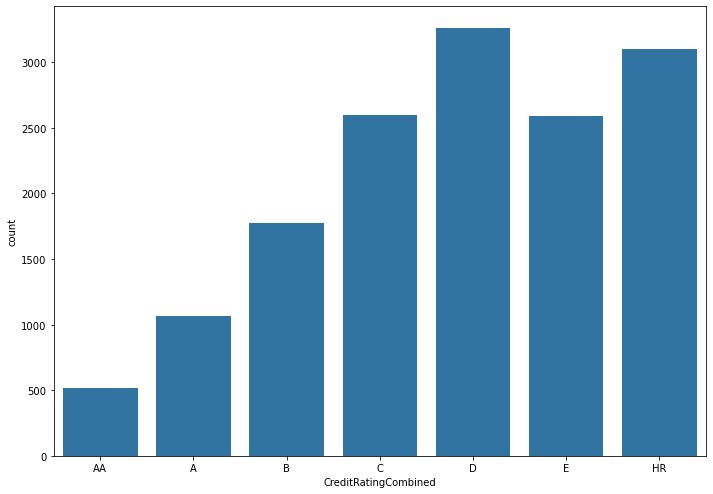

In [26]:
# Credit Rating bar chart
plt.figure(figsize=[11.69, 8.27])
default_color = sb.color_palette()[0]
sb.countplot(data=df, x='CreditRatingCombined', color=default_color,
             order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

The Credit Rating bar chart shows that the irrecoverable loans mostly came from borrowers with credit rating D and HR, following by credit rating E and C. As expected, borrowers with credit rating AA has the lowest number.

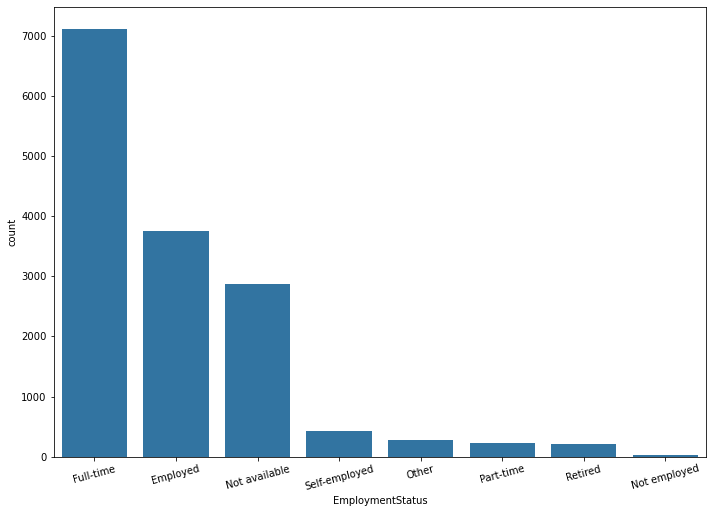

In [27]:
# Employment Status bar chart
plt.figure(figsize=[11.69, 8.27])
sb.countplot(data=df, x='EmploymentStatus', color=default_color, order=df['EmploymentStatus'].value_counts().index)
plt.xticks(rotation=15);

It appears that there are a number of Employment Status category. I will narrow it down to Employed, Not Employed and Not Available.

In [28]:
# Categorize the Employment Status into 3 categories: Employed, Not Employed, Not Available
employed = ['Full-time', 'Self-employed', 'Part-time']
df.loc[df.EmploymentStatus.isin(employed), "EmploymentStatus"] = "Employed"
df.loc[df.EmploymentStatus=="Retired", "EmploymentStatus"] = "Not employed"
df.loc[df.EmploymentStatus=="Other", "EmploymentStatus"] = "Not available"

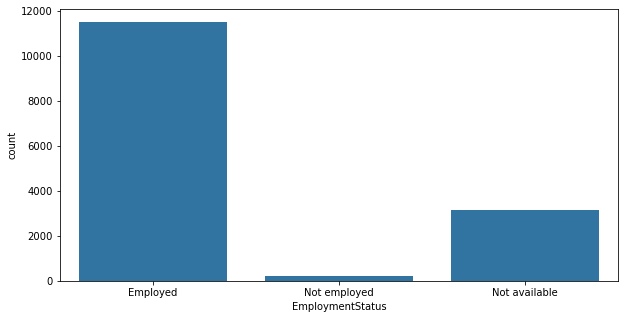

In [29]:
# Recreate the bar chart
plt.figure(figsize=[10,5])
sb.countplot(data=df, x='EmploymentStatus', color=default_color, order=['Employed', 'Not employed', 'Not available']);

The bar chart above shows that the irrecoverable loans mostly came from people who are employed, which is expected since it should be one of the conditions of having your loan approved. However it also appears that some losses came from borrowers who did not disclose their employment status.  

Now we know that majority of irrecoverable loans came from employed people rather than unemployed ones, we will take a look at the data based on the income ranges to spot if there is any specific income range that has tendency of irrecoverable loan.

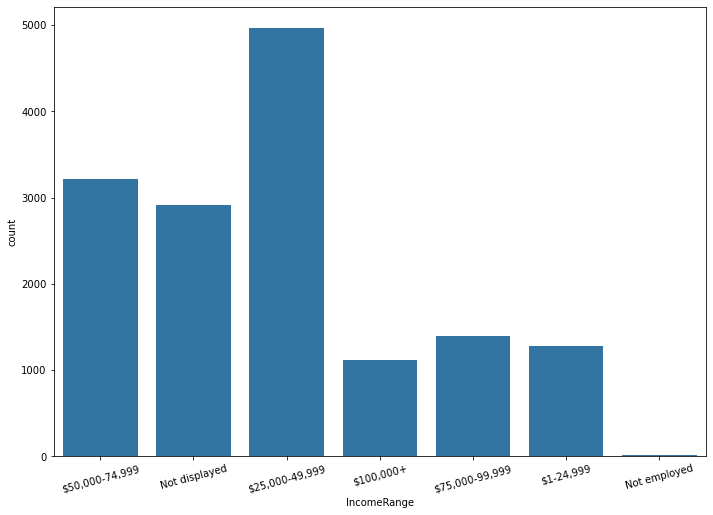

In [30]:
# Income Range bar chart
plt.figure(figsize=[11.69, 8.27])
sb.countplot(data=df, x='IncomeRange', color=default_color)
plt.xticks(rotation=15);

I noticed that Not employed can be considered as having 0 income. I will tidy this up so that it can be assigned ordered categorical data type along with the other ranges.

In [31]:
df.loc[df.IncomeRange=="Not employed", "IncomeRange"] = "$0"

In [32]:
# convert IncomeRange into ordered categorical types
income_range = ['Not displayed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ir = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df['IncomeRange'] = df['IncomeRange'].astype(ir);

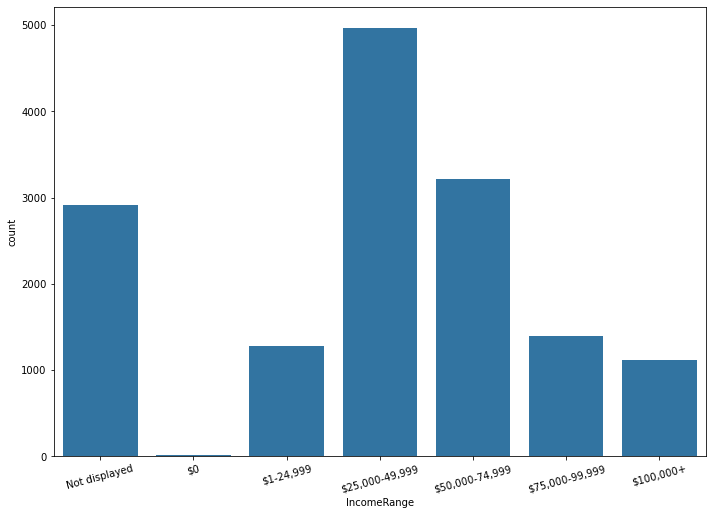

In [33]:
# Recreate the bar chart
plt.figure(figsize=[11.69, 8.27])
sb.countplot(data=df, x='IncomeRange', color=default_color)
plt.xticks(rotation=15);

From the Income Range bar chart, most of the irrecoverable loans came from borrowers with income range between 25,000-49,999 followed by 50,000-74,999. A sizeable portion also came from a group of people who did not disclose their income range. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Nett Principal Loss has a long-tailed distribution, with largest amount being 25,000 and majority of the losses under 5,000. I transformed the data to a log scale which resulted in bimodal distribution with peak between 2,000 and 5,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I cleaned up the grouping of Employment Status and Income Range data. For the Employment Status, I am more interested to compare the group of people who are employed and unemployed, so the data was divided into 3 categories: Employed, Not employed, and Not available. Whereas for Income Range, I performed an ordered categorization to compare the income range of the borrowers.

## Bivariate Exploration

> First, I will look at the relationship between Nett Principal Loss and Debt-to-Income Ratio.

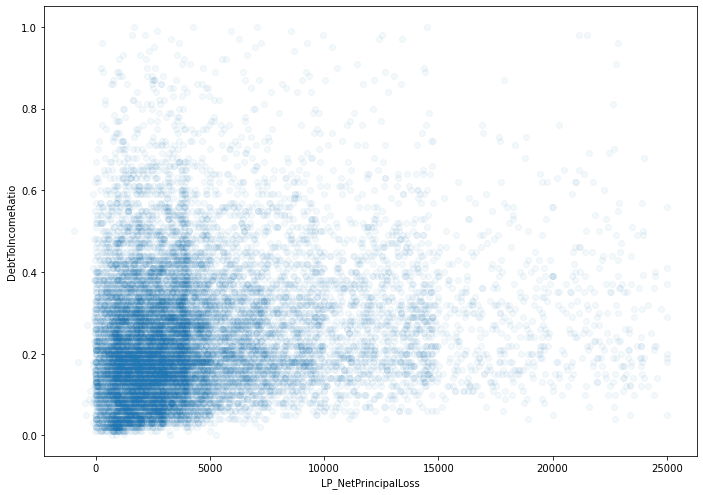

In [34]:
plt.figure(figsize=[11.69, 8.27])
sb.regplot(data=df, x='LP_NetPrincipalLoss', y='DebtToIncomeRatio', truncate=False, fit_reg=False, 
           x_jitter=0.3, scatter_kws={'alpha':1/20});

Most of the data points are clustered in the loss amount of under 5000. Let's try to see the data points with sampling.

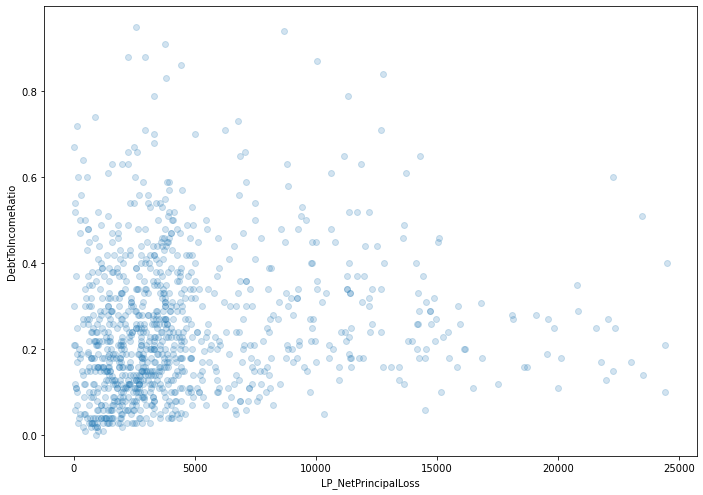

In [35]:
df_sample=df.sample(1000)
plt.figure(figsize=[11.69, 8.27])
sb.regplot(data=df_sample, x='LP_NetPrincipalLoss', y='DebtToIncomeRatio', truncate=False, fit_reg=False, 
           scatter_kws={'alpha':1/5});

I still get the same results with most data points clustered in one corner of the chart. It seems that Debt-to-Income Ratio does not contribute to the Nett Principal Loss amount. Next, I will look at this data on a heatmap.

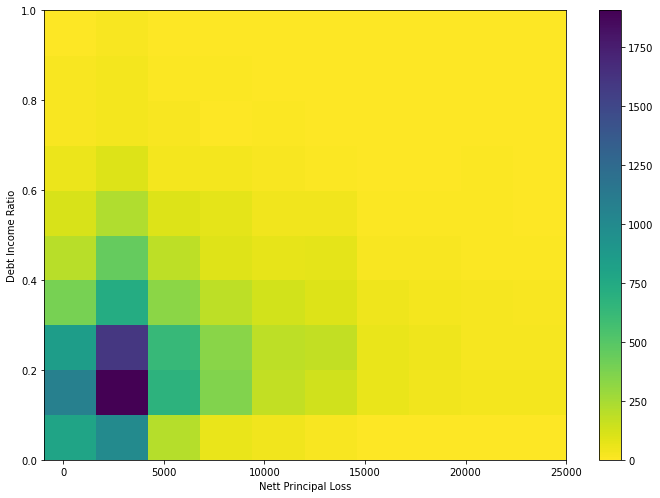

In [36]:
plt.figure(figsize=[11.69, 8.27])
plt.hist2d(data=df, x='LP_NetPrincipalLoss', y='DebtToIncomeRatio', cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Nett Principal Loss')
plt.ylabel('Debt Income Ratio');

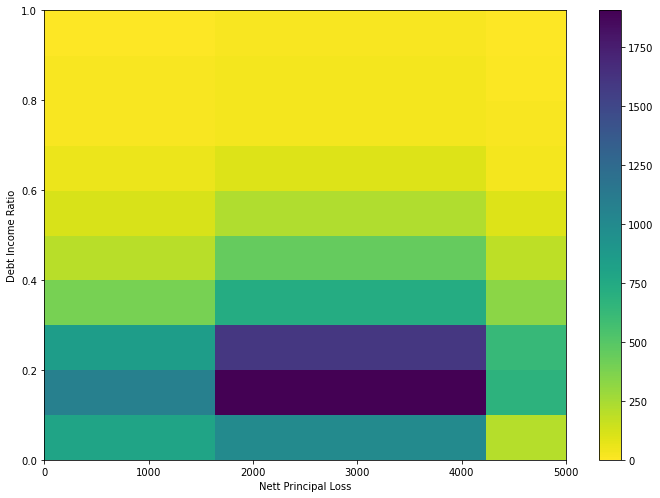

In [37]:
# A closer look on the concentrated data points with x value between 0 and 5000
plt.figure(figsize=[11.69, 8.27])
plt.hist2d(data=df, x='LP_NetPrincipalLoss', y='DebtToIncomeRatio', cmap = 'viridis_r')
plt.xlim(0,5000)
plt.colorbar()
plt.xlabel('Nett Principal Loss')
plt.ylabel('Debt Income Ratio');

The heatmap suggests that the highest number of losses is amounting between 2000 to 4000 with borrowers having Debt-to-Income Ratio around 0.2.

I will now move on to see the relationship between the numerical variables with the categorical variables.

In [38]:
categoric_vars = ['CreditRatingCombined', 'EmploymentStatus', 'IncomeRange']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

<Figure size 720x720 with 0 Axes>

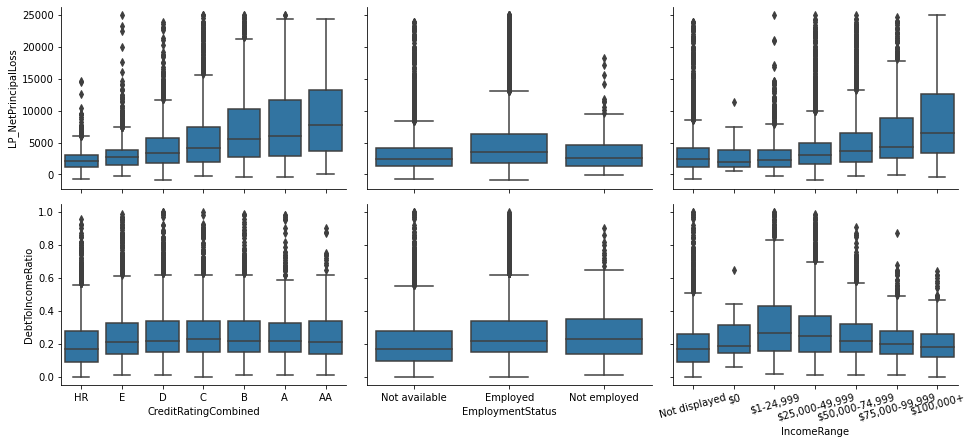

In [39]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['LP_NetPrincipalLoss', 'DebtToIncomeRatio'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=15);

From the box plot above, we can observe increasing trend of Nett Principal Loss with better credit rating and higher income range. The loss amount is also higher for the employed group of people. There is not much difference observed in Debt-to-Income Ratio for various credit ratings and employment status. However it appears that people with Income Range between 1 - 24,999 is having slightly higher Debt-to-Income Ratio.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

<Figure size 720x720 with 0 Axes>

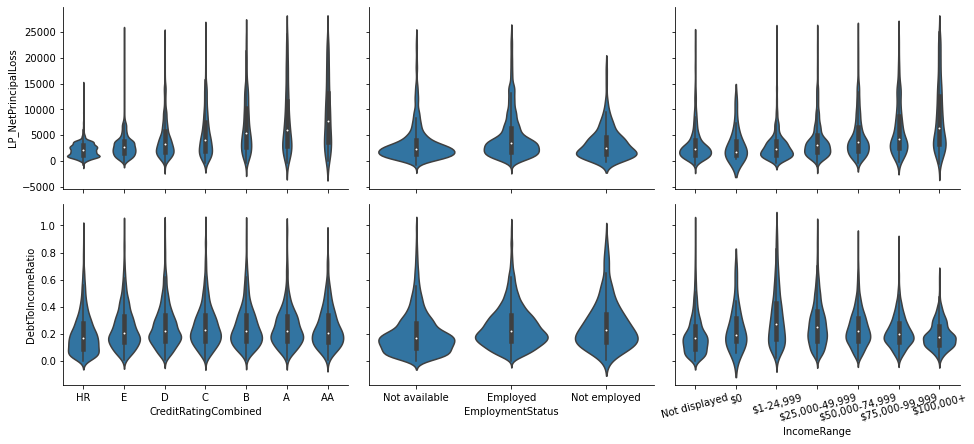

In [40]:
def violingrid(x, y, **kwargs):
    """ Quick hack for creating violin plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['LP_NetPrincipalLoss', 'DebtToIncomeRatio'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(violingrid)
plt.xticks(rotation=15);

The violin plot tells a better data distribution than the previous box plot. In particular, we can see that the distribution of Nett Principal Loss is getting slimmer as the Credit Rating gets higher. This is also true when Income Range gets higher. 

Next we will look at the relationship between the categorical variables.

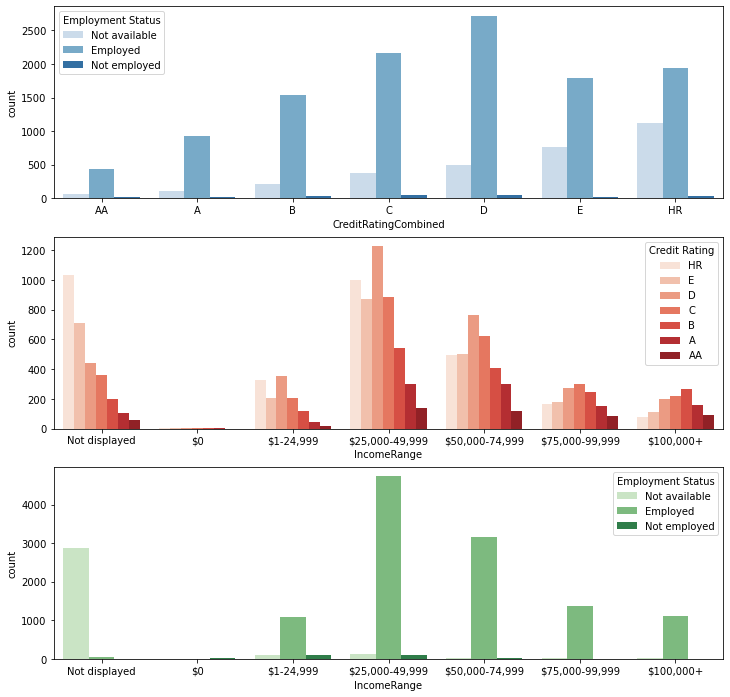

In [41]:
plt.figure(figsize = [12, 12])

# subplot 1: Credit Rating vs Employment Status
plt.subplot(3, 1, 1)
sb.countplot(data=df, x = 'CreditRatingCombined', hue = 'EmploymentStatus', palette = 'Blues',
             order=['AA','A','B','C','D','E','HR'])
plt.legend(title='Employment Status')

# subplot 2: Income Range vs. Credit Rating
plt.subplot(3, 1, 2)
sb.countplot(data=df, x = 'IncomeRange', hue = 'CreditRatingCombined', palette = 'Reds')
plt.legend(title='Credit Rating')

# subplot 3: Income Range vs. Employment Status
plt.subplot(3, 1, 3)
sb.countplot(data=df, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Greens')
plt.legend(title='Employment Status')

plt.show()

There seems to be no meaningful relationship between the three categorical variables. However from the second subplot (Income Range vs Credit Rating) we can see the pattern that people who did not disclose their income range has higher tendency of having bad credit rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There seems to be no correlation between Nett Principal Loss and Debt-to-Income Ratio. Most borrowers with irrecoverable loans are having Debt-to-Income Ratio approximately under 0.4 which is considered as healthy ratio. Most irrecoverable losses are ranging between 2,000 and 4,000, although I spotted some outliers within the range above 20,000.  

> I also observed an increasing trend of Nett Principal Loss with better credit rating and higher income range. The loss amount is also higher for the employed group of people. It may be because people with better credit rating and higher income range tend to be granted with higher loan amount, so when the loan gets defaulted, the loss amount will be higher.  

> There is not much difference observed in Debt-to-Income Ratio for various credit ratings and employment status. However it appears that people with income range between 1 - 24,999 is having slightly elevated Debt-to-Income Ratio. From the violin plot, we could observe that the distribution of Nett Principal Loss is getting slimmer as the credit rating and income range get higher.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When I plotted the Credit Rating, Employment Status, and Income Range in a clustered bar chart, there seemed to be no meaningful relationship between the three categorical variables. However I noticed that people who did not disclose their income range has higher tendency of having bad credit rating. This evidence may serve as a call for Prosper Loan to tighten their loan approval process, especially when information on income is not available.

## Multivariate Exploration

> Next I will be plotting the numerical variables together with the categorical variables to have a deeper look on their relationship. I will start off with Debt-to-Income Ratio and Nett Principal Loss with Credit Rating and Employment Status.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


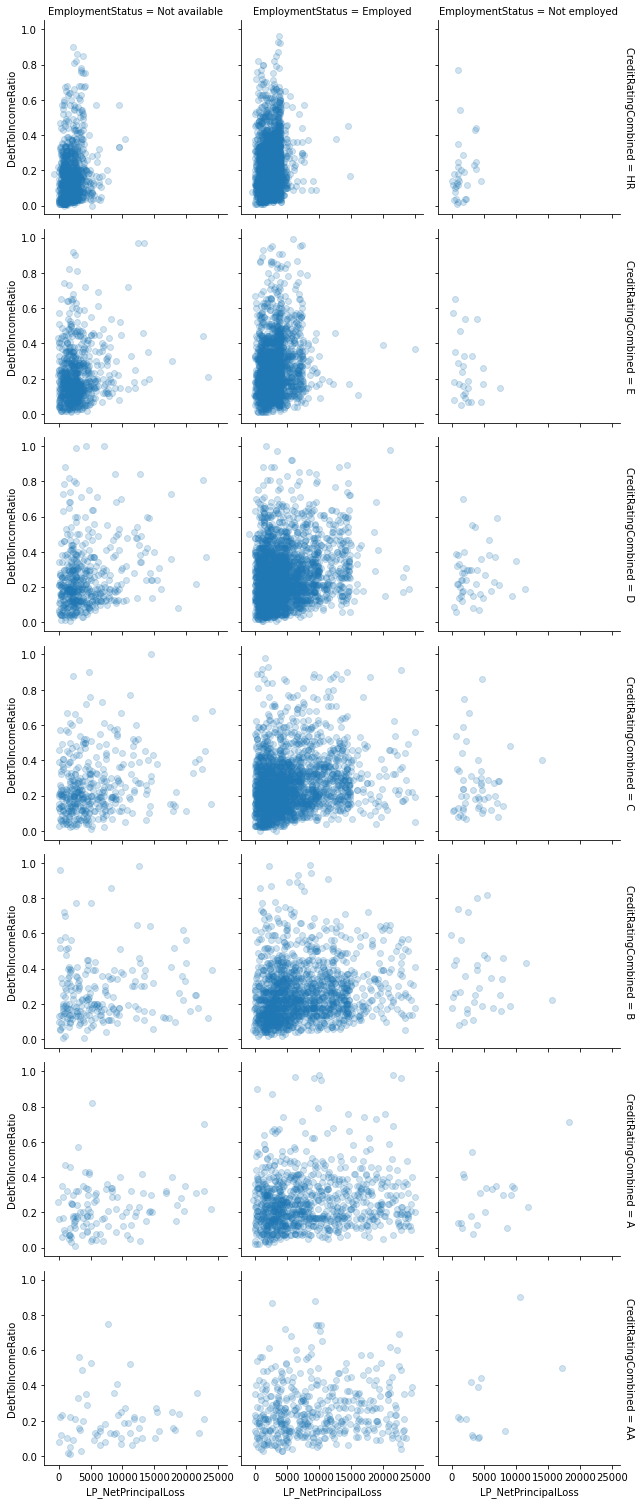

In [36]:
g = sb.FacetGrid(data=df, col='EmploymentStatus', row='CreditRatingCombined', size=3, margin_titles=True)
g.map(plt.scatter, 'LP_NetPrincipalLoss', 'DebtToIncomeRatio', alpha=1/5);

It appears that most irrecoverable loans come from the employed group of people with increasing number as the credit rating goes lower. We can also observe higher loss amount from people with credit rating between AA to D. For credit rating E and HR, the losses tend to be within 5000 range. It is also worth noting as credit rating goes lower, the number of people having higher Debt-to-Income Ratio is increasing.  

Next I will plot the numerical variables together with Income Range.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


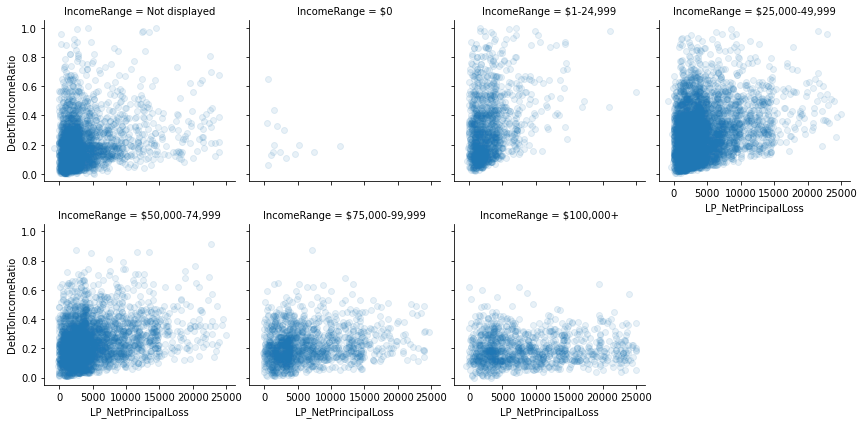

In [37]:
g = sb.FacetGrid(data = df, col = 'IncomeRange', col_wrap = 4, size = 3, margin_titles = True)
g.map(plt.scatter, 'LP_NetPrincipalLoss', 'DebtToIncomeRatio', alpha=1/10);

I noticed that the data points are concentrated for income range 25,000-49,999 and 50,000-74,999, with a number of data points pointing to higher loss amount. Prosper Loan may want to review their loan amount limit for these group of income range. Another observation that I made is the concentrated data points for the people without income range information. It may be that they only disclosed their employment status and occupation, but not their income range. This evidence suggests that income range is an important factor to consider loan approval.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As credit rating goes lower, the possibility of loans being irrecoverable gets higher. We also observed a trend where as credit rating goes lower, the number of people having higher Debt-to-Income Ratio is increasing. 

### Were there any interesting or surprising interactions between features?

> It is interesting to find that most irrecoverable losses came from the group of people with income range between 25,000 and 74,999. A sizeable amount of loss also came from the group of people who did not disclose their income range. It may be that they only disclosed their employment status and occupation, but not their income range. This evidence suggests that income range is an important factor to consider loan approval.